In [156]:
# Exploratory Data Analysis Project 1 
### Constantinos Skevofilax

In [157]:
import pandas as pd
import numpy as np 
cars = pd.read_csv('data/project1.data')

In [107]:
# Data shape
cars.shape

(398, 9)

In [108]:
# Data Size 
cars.size

3582

In [109]:
# Data types 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [110]:
# Horsepower is of type 'object', need to check to see why that is and what those values are 

In [111]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [112]:
# ChatGPT 
non_int_horsepower_values = cars.loc[~cars['horsepower'].astype(str).str.isdigit(), 'horsepower']
non_int_horsepower_values

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

In [113]:
# Need to replace the values that have a '?' with the median value for horsepower 
cars['horsepower'] = cars['horsepower'].replace('?', np.nan)
cars['horsepower'] = cars['horsepower'].astype(float) # Make float to use median 
median_horsepower = cars['horsepower'].median()
cars['horsepower'].fillna(median_horsepower, inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


/tmp/ipykernel_5616/4063220940.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['horsepower'].fillna(median_horsepower, inplace=True)


In [114]:
# Convert origin column into 3 boolean columns because its a category, not a value 
# IE. One-hot encoding
origin_dummies = pd.get_dummies(cars['origin'], prefix='origin')
origin_dummies = origin_dummies.rename(columns={'origin_1': 'American', 'origin_2': 'European', 'origin_3': 'Japanese'})
cars = pd.concat([cars, origin_dummies], axis=1)

# Drop the original 'origin' column
cars = cars.drop('origin', axis=1)

In [115]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,American,European,Japanese
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,True,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,False,True,False
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,True,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,True,False,False


In [119]:
# Statistical information
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Car Model by Year Distribution')

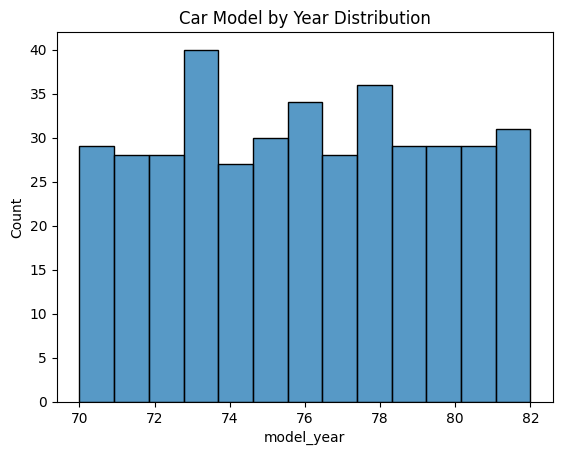

In [137]:
sns.histplot(data=cars['model_year'], bins = 13)
plt.title("Car Model by Year Distribution")

Text(0.5, 1.0, 'Car Horsepower Distribution')

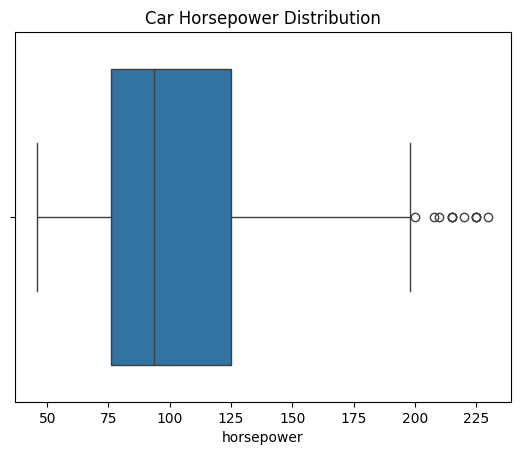

In [133]:
sns.boxplot(data=cars, x='horsepower')
plt.title("Car Horsepower Distribution")

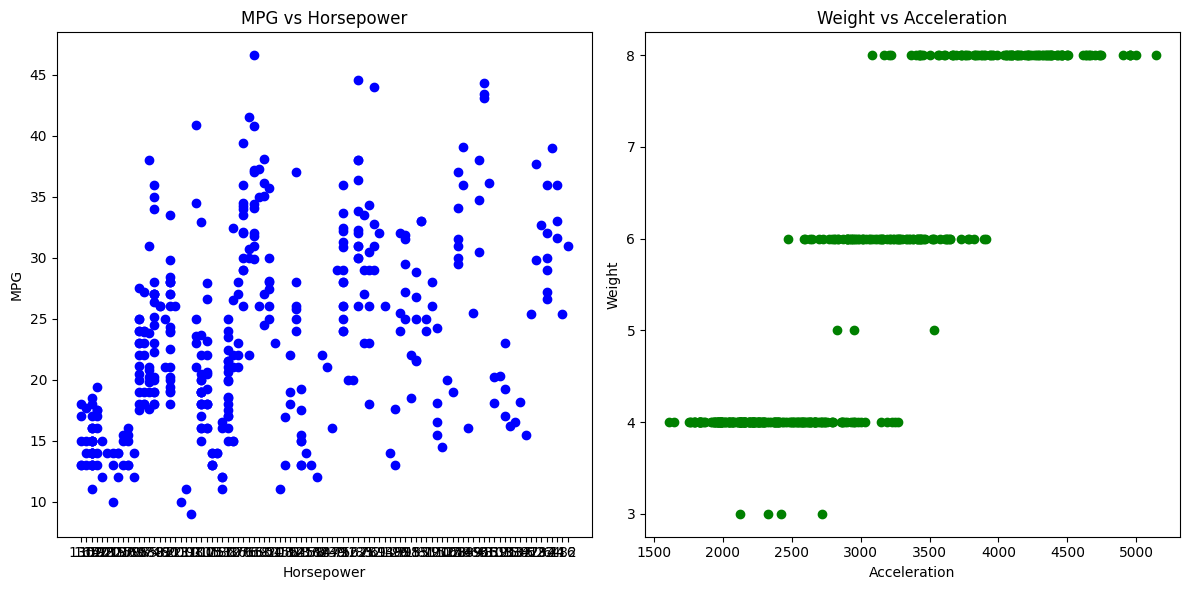

In [159]:
# GPT
plt.figure(figsize=(12, 6))
# Plotting mpg vs horsepower
plt.subplot(1, 2, 1)
plt.scatter(cars['horsepower'], cars['mpg'], color='blue')
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Plotting cylinders vs acceleration
plt.subplot(1, 2, 2)
plt.scatter(cars['weight'], cars['cylinders'], color='green')
plt.title('Weight vs Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('Weight')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Car Model Year by Number of Cylinders')

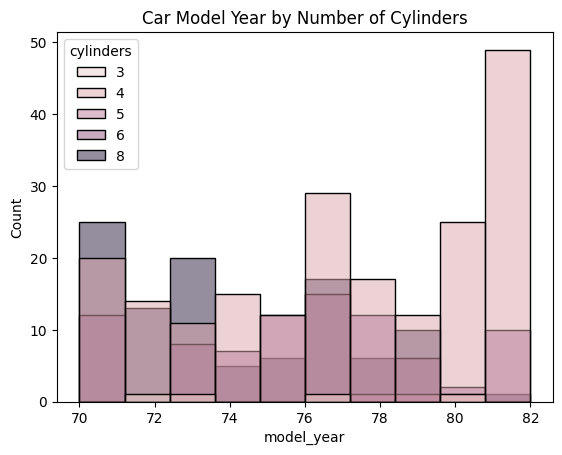

In [140]:
sns.histplot(x=cars['model_year'], hue=cars['cylinders'])
plt.title('Car Model Year by Number of Cylinders')

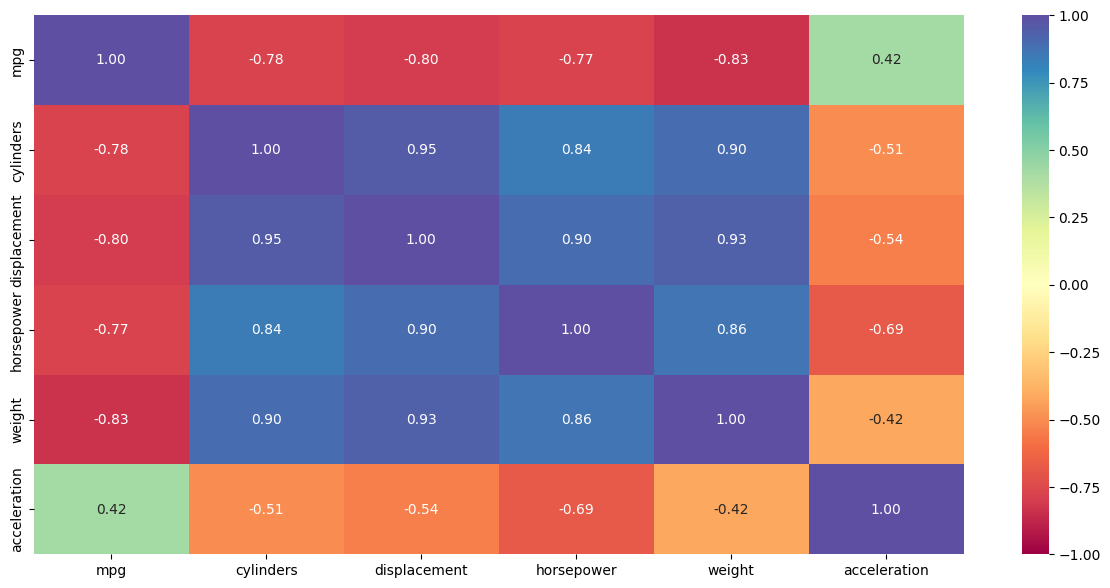

In [141]:
# columns to corrolate
corr_cols=['mpg','cylinders','displacement','horsepower','weight','acceleration']

# increate the figure size
plt.figure(figsize=(15, 7))

# the actual heat map
sns.heatmap(
   cars[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# show the plot
plt.show()

In [145]:
import sklearn
import sklearn.linear_model 
from sklearn.model_selection import train_test_split

X = cars.drop(['car_name', 'mpg'], axis=1)
y = cars['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [147]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [148]:
lr.predict(X_test)

array([20.1512709 , 28.48412972, 19.62003982, 26.98681173, 24.05101299,
       15.55867185, 30.18259745, 34.63155284, 16.05322534, 10.52388707,
       29.94087291, 15.86711364, 22.16889257, 27.64264735, 36.50101551,
       23.83596545, 11.33940194, 19.82060352,  9.33760049, 33.59046665,
       26.87075909, 32.46000042, 20.62542088, 25.63306779, 26.14203351,
       30.8637485 , 32.77889023, 32.92997078, 14.34721484, 29.79079199,
       26.71761084, 11.75697859, 22.38742951, 28.96558214, 24.84528439,
       13.74411786, 26.48468725,  9.99808461, 30.68076651, 23.92245   ,
       24.13819016, 24.31500499, 20.04150548, 33.8925421 , 25.13569021,
       21.72274618, 21.2185178 , 11.40557986, 28.87201832, 18.80010142,
       24.84331019, 26.48209578, 16.32418898, 11.79928852, 28.22832931,
       25.77797913, 10.86384629, 12.83567095, 30.91730498, 35.58529718,
       36.56606066, 35.75056579, 17.09726477, 26.46751717, 20.13313217,
       33.33850262, 25.56995995, 25.90458748, 29.35096143, 12.06

In [152]:
delta = abs(y_test-lr.predict(X_test))
delta.describe()

count    199.000000
mean       2.643605
std        2.088389
min        0.075833
25%        1.082575
50%        2.156690
75%        3.599030
max        9.988173
Name: mpg, dtype: float64

In [153]:
lr.score(X_test, y_test)

0.8200513773429663

In [158]:
lr.score(X_train, y_train)

0.8224911800808389